# Classifying wine data using XGBoost

Use an XGBoost model to complete the classification of wine quality.

XGBoost stands for eXtreme Gradient Boosting. It's a popular machine learning framework used for supervised learning tasks, primarily in classification and regression problems. It's known for its efficiency, speed and performance, often outperforming other algorithms in competitions and real world applications.


XGBoost uses [boosting](https://www.ibm.com/topics/boosting) to build a series of [decision trees](https://www.ibm.com/topics/decision-trees) iteratively, where each new tree corrects errors made by the previous set of trees. During training, it minimizes a loss function, a function that measures the difference between the predicted and actual values. The "gradient" in eXtreme Gradient Boosting refers to the [gradient descent](https://www.ibm.com/topics/gradient-descent) optimization technique used in XGBoost to minimize the loss when adding new models.

XGBoost is customizable and has various hyperparameters that allow users to fine-tune the model for specific use cases. In this tutorial, we will train an XGBoost model on the UCI Machine Learning Repository [wine datasets](https://archive.ics.uci.edu/dataset/186/wine+quality) to predict wine quality. We will then perform hyperparameter tuning to find the optimal hyperparameters for our model.

 

# Steps
## Step 1: Set up your environment

While there are various tools we may use, we’ll walk you through how to set up an IBM account to use a Jupyter notebook. Jupyter notebooks are widely used within data science to combine code, text, images, data visualizations to formulate a well-formed analysis.

1. Log in to watsonx.ai using your IBM Cloud account.

2. Create a watsonx.ai project.

    a. Click the hamburger menu at the top left of the screen, and then select Projects > View all projects. b. Click the New project button. c. Select Create an empty project. d. Enter a project name in the Name field. e. Select Create.

3. Create a Jupyter notebook.

    a. In your project environment, select the Assets tab. b. Click the New Asset button. c. Select Work with data and models in Python or R notebooks. d. Enter a name for your notebook in the Name field. e. Select Create

This step will open a Notebook environment where you can load your data set and copy the code from this tutorial to implement a binary classification task using the gradient boosting algorithm.

## Step 2: Install and import relevant libraries



In [1]:
# installations
%pip install matplotlib
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install seaborn
%pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import xgboost as xgb

from sklearn.metrics import accuracy_score,
from sklearn.model_selection import GridSearchCV, train_test_split

## Step 3: Load the datasets

For this tutorial, we will use the wine quality datasets from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality) to classify wine quality using XGBoost.

1. Download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality).

1. Unzip the files and reformat them as .csv files.

1. Upload the two .csv files from your local system to your notebook in watsonx.ai.

1. Read the data in by selecting the </> icon in the upper right menu, and then selecting **Read data**.

1. Select **Upload a data file**.

1. Drag both your data sets over the prompt, **Drop data files here or browse for files to upload**. Within **Selected data**, select your data file (for example, winequality-red.csv) and load it as a pandas DataFrame.

1. Select Insert code to cell or the copy to clipboard icon to manually inject into your notebook. Make sure to add the `sep` argument to the code for the two wine datasets (for example, df_1 = pd.read_csv(body, sep = ';'))

In [3]:
# Here's how to load the data locally
white_df = pd.read_csv('winequality-white.csv', sep=';')
print(white_df.shape)
white_df.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
red_df = pd.read_csv('winequality-red.csv', sep=';')

print(red_df.shape)
red_df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


After printing the shapes of the two dataframes, we see that the white wine dataset has 4,898 instances and the red wine dataset has 1,599.

## Step 4: Concatenate the two datasets and conduct an exploratory data analysis

Before combining our two datasets together, let's add a column to each for a "whine wine" label, where 1 designates a white wine label and 0 designates a red wine label. The white wine label not only becomes a new feature for our dataset, but is also helpful in tracking our initial two dataframes to make sure we've combined them correctly.

In [5]:
white_df['white_wine'] = 1
red_df['white_wine'] = 0

Next, we can combine the two datasets using the pandas function `pd.concat().`

In [6]:
red_white_df = pd.concat([red_df,white_df])
red_white_df.shape

(6497, 13)

Before proceeding with some exploratory data analysis, let's shuffle our data so it's not starkly segmented between the red and white wine datasets and rename our dataframe `wine_df`.

In [7]:
wine_df = red_white_df.sample(frac=1).reset_index(drop = True)
print(wine_df.shape)
wine_df.head()

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white_wine
0,6.2,0.280,0.28,4.3,0.026,22.0,105.0,0.98900,2.98,0.64,13.1,8,1
1,6.4,0.125,0.36,1.4,0.044,22.0,68.0,0.99014,3.15,0.50,11.7,7,1
2,6.5,0.170,0.31,1.5,0.041,34.0,121.0,0.99092,3.06,0.46,10.5,6,1
3,7.0,0.350,0.17,1.1,0.049,7.0,119.0,0.99297,3.13,0.36,9.7,6,1
4,6.9,0.200,0.28,1.2,0.048,36.0,159.0,0.99360,3.19,0.43,9.1,6,1


Let's check for any missing values in the combined dataset.

In [8]:
# no missing values
wine_df.isnull().values.any()

False

We confirmed that there are no missing values in our dataset. Next, let's visualize the percentage breakdown of red and white wine. Although the red and white labels won't be our target variable, it's good to check that our datasets were combined as expected.

In [9]:
#check that value counts match the initial white_df and red_df lengths
wine_df['white_wine'].value_counts()

white_wine
1    4898
0    1599
Name: count, dtype: int64

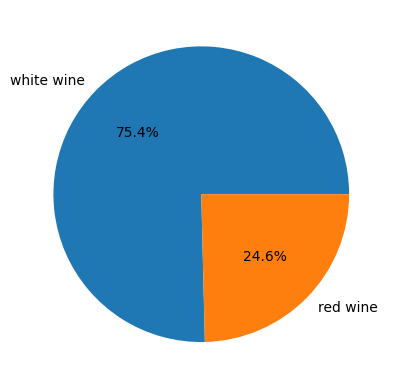

In [10]:

wine_values = wine_df['white_wine'].value_counts().values
wine_labels = ["white wine", "red wine"]
plt.pie(wine_values,labels=wine_labels, autopct='%1.1f%%',)
plt.show()

Let's continue with visualizing our target variable, the wine quality.

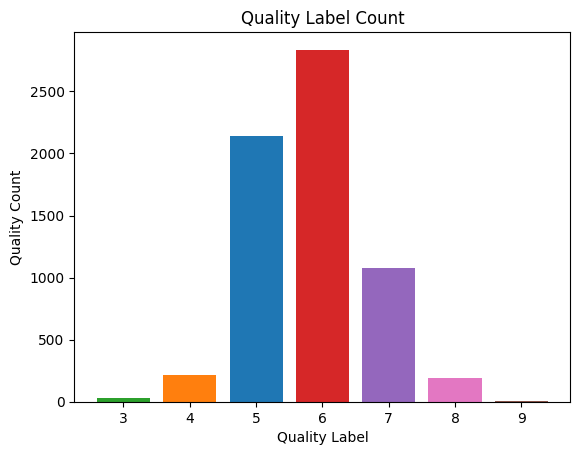

In [11]:

fig, ax = plt.subplots()
quality_values = wine_df['quality'].value_counts().values
quality_labels = wine_df['quality'].value_counts().index
bar_colors = ['tab:red', 'tab:blue', 'tab:purple', 'tab:orange', 'tab:pink','tab:green', 'tab:brown']

ax.bar(quality_labels, quality_values, label=quality_labels, color= bar_colors)
ax.set_ylabel('Quality Count')
ax.set_xlabel('Quality Label')
ax.set_title('Quality Label Count')

plt.show()


Here we can see that the label of "6" makes up a large amount of our population. And the labels of "3" and "9" happen infrequently by comparison. Having an imbalanced dataset may cause some [overfitting](https://www.ibm.com/topics/overfitting) issues where our model may learn to memorize the majority class examples (i.e. our "5" and "6" labels) without capturing underlying patterns in the data for our minority classes. In order to not have such an imbalanced dataset, let's split the quality in two buckets: the first bucket contains anything "6" or higher (i.e. good quality) and the second bucket contains wine of lower quality with anything labeled "5" or lower.

In [12]:
wine_df['good_quality'] = [0 if x < 6 else 1 for x in wine_df['quality']]
wine_df['good_quality'].value_counts(normalize=True)

good_quality
1    0.633061
0    0.366939
Name: proportion, dtype: float64

Now we see that our dataset is more balanced with a 63% good quality and 37% poor quality dataset. Although there is still a minority class, it is better represented than our initial classes of "3"s and "9"s.

Now that we have a new target variable column, we can drop the numbered `quality` column in favor of the `good_quality` column we just created.

In [13]:
wine_df = wine_df.drop(['quality'], axis =1)

Finally, as part of our exploratory data analysis, let's visualize the statistical correlation between our features by plotting a correlation heatmap.

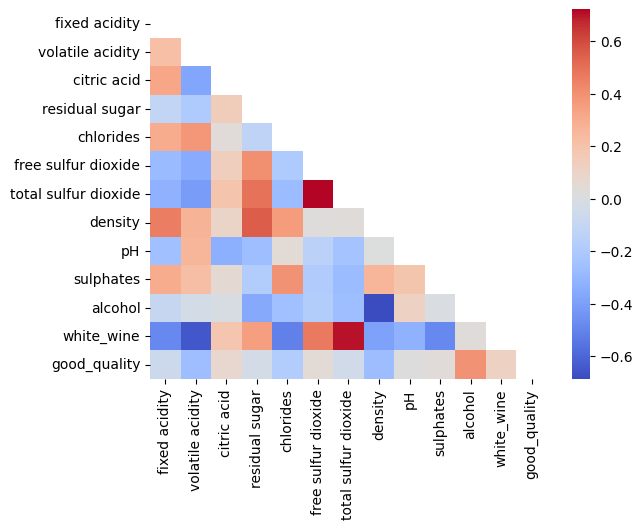

In [14]:
mask = np.triu(np.ones_like(wine_df.corr())) 
  
# plotting a triangle correlation heatmap 
dataplot = sns.heatmap(wine_df.corr(), cmap="coolwarm",mask=mask) 


We can see some standout correlations, including a high positive correlation between total sulfur dioxide and free sulfur dioxide, as well as total sulfur dioxide having a high positive correlation with white wine. Some high negative correlations include that between alcohol and density as well as that between white wine and volatile acidity.

## Step 5: Split your data

We continue with splitting our data between a training dataset and testing dataset. The training data will train our XGBoost model and the test set will help us evaluate our model's performance. In this case, we'll set aside 30% of our dataset for the test set. We will also use the `stratify` parameter to ensure that our train and test set include the same proportion of our target variable, `good_quality.`

In [15]:
# Split data into X and y
X = wine_df.drop(columns=['good_quality'], axis=1)
y = wine_df['good_quality']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)


In [17]:
#check that y_train has 63%/37% breakdown of `good_quality` wine
y_train.value_counts(normalize=True)

good_quality
1    0.633165
0    0.366835
Name: proportion, dtype: float64

In [18]:
#check that y_test has 63%/37% breakdown of `good_quality` wine
y_test.value_counts(normalize=True)

good_quality
1    0.632821
0    0.367179
Name: proportion, dtype: float64

## Step 6: Convert data to DMatrix format, create and evaluate a baseline model

As discussed in the XGBoost explainer, XGBoost typically expects data to be in a DMatrix format, its internal data structure optimized for memory efficiency and training speed. Let's convert our train and test sets to DMatrix format.

In [19]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test,label=y_test)

Once we have converted the data to the right format, we can continue with creating our baseline model. We will denote the learning objective, but we will not set any further parameters for now. Then we train the model using our training dataset.

In [20]:
learning_objective = {'objective':'binary:logistic' }
model = xgb.train(params = learning_objective, dtrain= dmatrix_train)

We'll evaluate our model using our test set. Note that we're rounding the predictions for our test set because the output predictions are in float format to denote probability, but we're expecting the output to be in 0s and 1s.

In [21]:
test_predictions = model.predict(dmatrix_test)
round_test_predictions = [round(p) for p in test_predictions]
accuracy_score(y_test,round_test_predictions)

0.7717948717948718

Our baseline model's accuracy is 77%. Let's see if we can get higher accuracy with some hyperparameter tuning.

## Step 7: Use GridSearchCV to tune hyperparameters

GridSearchCV, which stands for "Grid Search Cross-Validation," is a technique used for hyperparameter tuning. First we set up a dictionary of parameters we want to test and then GridSearchCV systematically iterates through our dictionary to find the optimal combination which yields the best model accuracy. We will be tuning the following hyperparameters in our XGBoost model:

- **Learning Rate** is the rate at which the boosting algorithm learns from each iteration. A lower value of eta means slower learning, as it scales down the contribution of each tree in the ensemble.
- **Gamma** controls the minimum amount of loss reduction required to make a further split on a leaf node of the tree. A lower value means XGBoost stops earlier but may not find the best solution; while a higher value means XGBoost continues training longer, potentially finding better solutions, but with greater risk of [overfitting](https://www.ibm.com/topics/overfitting). 
- **Max_depth** represents how deeply each tree in the boosting process can grow during training. A tree's depth refers to the number of levels or splits it has from the root node to the leaf nodes. Increasing this value will make the model more complex and more likely to overfit. In XGBoost, the default max_depth is 6, which means that each tree in the model is allowed to grow to a maximum depth of 6 levels.
- **Min_child_weight** is used to control the minimum sum of weights required in a child (leaf) node. If the sum of the weights of the instances in a node is less than min_child_weight, then the node will not be split any further, and it will become a leaf node. By setting a non-zero value for min_child_weight, you impose a constraint on the minimum amount of data required to make further splits in the tree, encouraging simpler and more robust models. Min_child_weight curbs overfitting as its value increases. The default in the XGBoost library is 1.
- **Subsample** represents the fraction of the training dataset that is randomly sampled to train each tree in the ensemble. It's a form of stochastic gradient boosting that introduces randomness into the training process, helping to improve the model's robustness and reduce overfitting. Subsample should be a number between 0 and 1, where 1 means using the entire training dataset, and values less than 1 mean using a fraction of the dataset. The default value in the XGBoost library is 1. Decreasing the value from 1 helps to reduce overfitting.
- The **n_estimators** hyperparameter specifies the number of trees to be built in the ensemble. Each boosting round adds a new tree to the ensemble, and the model slowly learns to correct the errors made by the previous trees. N_estimators directs the complexity of the model and influences both the training time and the model's ability to generalize to unseen data. Increasing the value of n_estimators  typically increases the complexity of the model, as it allows the model to capture more intricate patterns in the data. However, adding too many trees can lead to overfitting. Generally speaking, as n_estimators goes up, the learning rate should go down.
- **Colsample_bytree** demonstrates the percentage of features (or columns) to be randomly sampled for each tree in the ensemble during training. It's a form of feature subsampling that introduces randomness into the training process, helping to improve the model's robustness by reducing the impact of individual features and by encouraging diversity among the trees in the ensemble. Colsample_bytree should be a number between 0 and 1, where 1 means using the entire training dataset, and values less than 1 mean using a fraction of the features. The default value in the XGBoost library is 1. Decreasing the value from 1 helps to reduce overfitting.


In [22]:

params_grid = {
    'learning_rate': [0.01, 0.05],
    'gamma':[0, 0.01],
    'max_depth': [6, 7],
    'min_child_weight': [1, 2, 3,],
    'subsample': [0.6, 0.7,],
    'n_estimators': [400, 600, 800],
    'colsample_bytree':[0.7, 0.8],
    
} 

Next, let's define our classifier once again to use in GridSearchCV

In [23]:
classifier = xgb.XGBClassifier()

Then, we'll set up an instance of GridSearchCV with our classifier and params_grid. We'll use accuracy as our scoring method and a `cv` (cross validation) of 5. The `cv` number indicates the number of folds used in the cross-validation process. A `cv` of five means our dataset will be folded into 5 subsets. Each subset is then used once as a validation set while the remaining folds form the training set. We will fit the grid_classifier to our training dataset as shown below. 

In [24]:
grid_classifier = GridSearchCV(classifier, params_grid, scoring='accuracy', cv=5)
grid_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.8], 'gamma': [0, 0.01],
                         'learning_rate': [0.01, 0.05], 'max_depth': [6, 7],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [400, 600, 800],
                         'subsample': [0.6, 0.7]},
             scoring='accuracy')

Let's print out the best parameters found by the grid_classifier:

In [27]:
best_parameters = grid_classifier.best_params_
best_parameters

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 600,
 'subsample': 0.6}

And finally, let's evaluate the new model with the optimal combination of parameters that GridSearchCV found.

In [28]:
grid_test_preds = grid_classifier.predict(X_test)
grid_test_accuracy = accuracy_score(y_test, grid_test_preds)
grid_test_accuracy

0.8276923076923077

Our accuracy increased to nearly 83%! Feel free to test out some more hyperparameter options to see if you can improve upon this accuracy further.